## PART 2: Help create dataset for image classification by returning coordinates of the face detected in the profile images.

In [ ]:
#Import required libraries
import cv2
import numpy as np
from google.colab import drive
from google.colab.patches import cv2_imshow
from zipfile import ZipFile
import os,sys
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [ ]:

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

with ZipFile('/content/drive/MyDrive/Great Learning/Computer Vision/Assignment 9 -Face Detection /Part 2 - training images.zip', 'r') as zf:
  zf.extractall()

In [ ]:
file_path = '/content/training_images'

In [ ]:
profile_img= []
for face in os.listdir(file_path):
   profile_img.append(face)


In [ ]:
#Number of images in the image list
len(profile_img)

1091

In [ ]:
#Function to detect faces in image using Haarcascades library.This function will return the file name, count of faces detected and coordinates where the face is detected, the fi
def detectFaceCoordinates(profile_img):
  face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
  eye_classifier = cv2.CascadeClassifier (cv2.data.haarcascades+'haarcascade_eye.xml')
  rect_img=[]
  coordinates=[]
 
  annotation=[]
  temp_coordinates=[]
  count=0
  

 
  for i in range(0 ,len(profile_img)):
    temp_coordinates=[]
    img= cv2.imread(os.path.join(file_path,profile_img[i]))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, scaleFactor=1.3)
    #print(len(faces))
    #if len(faces)==0:
      #annotation.append([0,(0,0,0,0),0])
    #else:
    for (x,y,w,h) in faces:
      count=count+1
      img = cv2.rectangle(img, (x, y),(x+w, y+h),  (255, 0, 255), 4)
      temp_coordinates.append([(x,y,w,h)])
          #print(temp_coordinates)
    annotation.append([len(faces),temp_coordinates,profile_img[i]])
    rect_img.append(img)  
   

  return rect_img,annotation,temp_coordinates


In [ ]:
#call the above function. 
#rect_img has the images along with bounding boxes, annotation has the count of faces, coordinates and file name.
rect_img=[]
annotation=[]
temp_coordinates=[]
rect_img,annotation,temp_coordinates= detectFaceCoordinates(profile_img)

In [ ]:
#Convert the list annotation obtained to dictionary 
myList = []
coord=[]
for (count,coordinates,filename) in annotation:
  coord=[]
  if count!= 0:
    for i in range(count):
      for coor in coordinates[i]:
        coord.append([{'x1':coor[0],'y1':coor[1],'w':coor[2],'h':coor[3]}])
  myList.append({"count":count,"coordinates":coord,"fileName":filename})


In [ ]:
print("Total number of images in the image directory :",len(profile_img))
print("Total number of records in annotation file :",len(annotation))
print("Total number of records in images with bounding box : ", len(rect_img))

Total number of images in the image directory : 1091
Total number of records in annotation file : 1091
Total number of records in images with bounding box :  1091


#### Display some samples

In [ ]:
myList[100]

{'coordinates': [[{'h': 389, 'w': 389, 'x1': 67, 'y1': 140}]],
 'count': 1,
 'fileName': 'real_00726.jpg'}

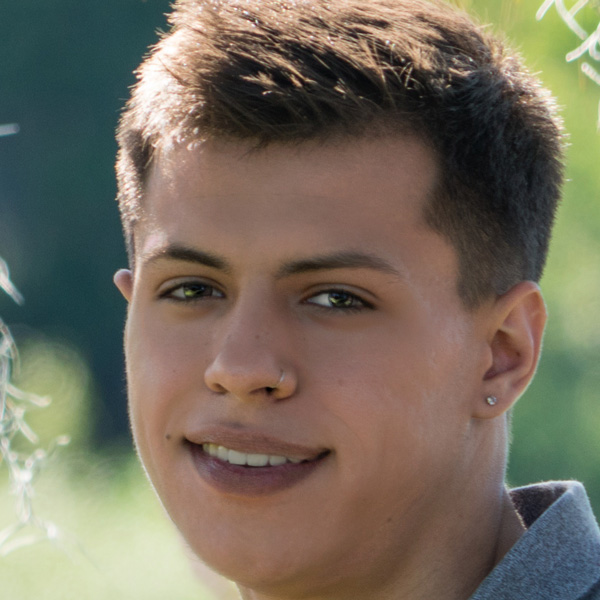

In [ ]:
img= cv2.imread(os.path.join(file_path,profile_img[100]))
cv2_imshow(img)

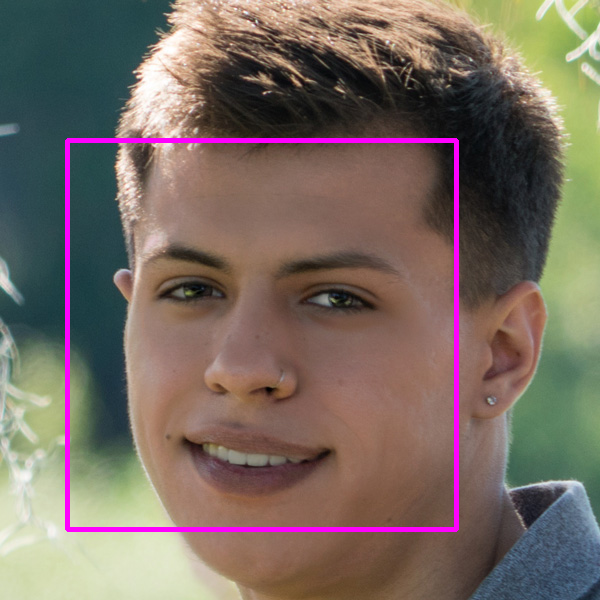

In [ ]:
cv2_imshow(rect_img[100])

### Challenges/skills in place during this task:
1. Research on implementation of Haar Cascade algorithm which is usually used to identify faces
2. Some image might have multiple faces. In order to store e coordinates of all the faces, developmental skills were put to test. The input images list length and final annotation file length need to match.
3. For some of the images, no face was detected. So they had to be handled appropriately.